### FINANCE

#### 1 – INSTALLING MODULES

Para este livro vamos usar algumas bibliotecas que já conhecemos do volumes anteriores, mas também alguns novos. Vamos precisar da seguinte lista:

· Pandas
· Pandas-Datareader
· Matplotlib
· MPL-Finanças
· NumPy
· Scikit-Learn
· Beautifulsoup4

Agora vamos dar uma olhada nas bibliotecas individuais. Vamos recapitular aqueles que já conhecem e também explicar para que vamos usar os novos.

##### PANDAS

Pandas é uma biblioteca que já usamos nos últimos dois volumes. Isto nos oferece a poderosa estrutura de dados chamada data frame. Com os Pandas podemos gerenciar nossos dados de maneira semelhante às tabelas SQL ou planilhas do Excel.

##### PANDAS-DATAREADER

O Pandas-Datareader é uma biblioteca adicional que vamos usar, em para carregar dados financeiros da internet. Ele carrega dados de APIs em quadros de dados.

##### MATPLOTLIB

Matplotlib é uma biblioteca que usamos para visualizar seus dados e nossos modelos. Nós pode escolher entre uma variedade de diferentes tipos e estilos de plotagem.

##### MPL-FINANCE

MPL-Finance é uma biblioteca que trabalha em conjunto com o Matplotlib e nos permite usar visualização especial para finanças. Vamos usá-lo para plotar castiçal gráficos.

##### NUMPY

NumPy é o nosso módulo fundamental para álgebra linear e lidar com arrays. É necessário para Matplotlib, Pandas e Scikit-Learn.

##### SCIKIT-LEARN

Scikit-Learn é o módulo que usamos no último volume do The Série da Bíblia Python. Oferece-nos muitos clássicos e tradicionais modelos de aprendizado de máquina. Vamos aplicar esses modelos ao nosso dados financeiros para fazer previsões.

##### BEAUTIFULSOUP4

Por último, mas não menos importante, estamos usando um novo módulo com o nome beautifulsoup4. Admito que este é um nome bastante estúpido e enganoso, mas esta biblioteca é um poderosa biblioteca de raspagem da web. Vamos usá-lo para extrair dados financeiros de arquivos HTML.

##### INSTALLATION

Estes são os comandos de instalação (com pip) para as bibliotecas necessárias:

In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install mpl-finance
#!pip install scikit-learn
#!pip install beautifulsoup4

#### 2 – LOADING FINANCIAL DATA

Agora que instalamos as bibliotecas necessárias, vamos começar por dando uma olhada em como carregar dados financeiros em nosso script. Para isso, iremos precisa das seguintes importações:

In [2]:
import datetime as dt

Estamos importando o módulo de dados da biblioteca pandas_datareader com o pseudônimo web. Este módulo será usado para obter nossos dados do Yahoo Finance API. Além disso, estamos importando o módulo datetime para que possamos especificar a hora quadros. Para fazer isso, usamos a função datetime.

In [3]:
start = dt.datetime(2020,1,1)
#end = dt.datetime(2019,1,1)

Aqui definimos uma data de início e uma data de término. Este é o nosso prazo. Quando carregamos os dados, queremos todas as entradas de 1º de janeiro de 2017 até até 1º de janeiro de 2019. Alternativamente, também podemos usar o função datetime.now, para especificar o presente como a data final.

In [4]:
end = dt.datetime.now()

A próxima etapa é definir um quadro de dados e carregar os dados financeiros nele. Para isso, precisamos saber quatro coisas. Primeiro: o símbolo do ticker da ação queremos analisar. Segundo: O nome da API que queremos receber os dados de. E por último: a data de início e término.

In [13]:
import yfinance as yf

# Define o ticker do ativo que você deseja obter dados
ticker = "AAPL"

# Obtém os dados do Yahoo Finance
df = yf.download(ticker, 
                 start="2008-06-01",
                 end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

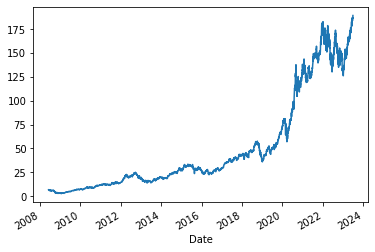

In [14]:
df.Open.plot()

In [15]:
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2008-06-02    6.735714    6.773214    6.590357    6.646429    5.649084   
2008-06-03    6.673571    6.721429    6.512143    6.620357    5.626924   
2008-06-04    6.572143    6.681786    6.543929    6.613929    5.621461   
2008-06-05    6.655000    6.780000    6.632143    6.765357    5.750167   
2008-06-06    6.714286    6.783929    6.626786    6.630000    5.635121   
...                ...         ...         ...         ...         ...   
2023-06-23  185.550003  187.559998  185.009995  186.679993  186.679993   
2023-06-26  186.830002  188.050003  185.229996  185.270004  185.270004   
2023-06-27  185.889999  188.389999  185.669998  188.059998  188.059998   
2023-06-28  187.929993  189.899994  187.600006  189.250000  189.250000   
2023-06-29  189.080002  190.070007  188.940002  189.589996  189.589996   

               Volume  
Date         

Estamos criando uma instância do DataReader e passamos os quatro parâmetros.
Neste caso, estamos usando a API do Yahoo Finance, para obter as informações financeiras
dados da empresa Apple (AAPL) desde a data inicial até a data final.

Para visualizar agora nossos dados baixados, podemos imprimir algumas entradas.

Aviso: Às vezes, a API do Yahoo Finance não responde e você recebe uma exceção. Nesse caso, seu código não é o problema e você pode resolver o problema problema esperando um pouco e tentando novamente.

Como você pode ver, agora temos um quadro de dados com todas as entradas desde a data de início para data final. Observe que temos várias colunas aqui e não apenas o preço de fechamento da ação do respectivo dia. Vamos dar uma olhada rápida no colunas individuais e seu significado.

Open: That’s the share price the stock had when the markets opened that
day.
Close: That’s the share price the stock had when the markets closed that day.
High: That’s the highest share price that the stock had that day.
Low: That’s the lowest share price that the stock had that day.
Volume: Amount of shares that changed hands that day.
Adj. Close: The adjusted close value that takes things like stock splits into
consideration.

Abertura: esse é o preço da ação que a ação tinha quando os mercados abriram.
dia.
Fechamento: esse é o preço da ação que a ação tinha quando os mercados fecharam naquele dia.
Alta: Esse é o preço mais alto que a ação teve naquele dia.
Baixo: Esse é o preço mais baixo que a ação teve naquele dia.
Volume: Quantidade de ações que mudaram de mãos naquele dia.
Adj. Fechamento: O valor de fechamento ajustado que leva coisas como divisões de ações em
consideração.

##### READING INDIVIDUAL VALUES

Como nossos dados são armazenados em um quadro de dados do Pandas, podemos usar a indexação que já conhece, para obter valores individuais. Por exemplo, só poderíamos imprimir o valores de fechamento.

In [8]:
print(df['Close'])

Date
2000-06-01      0.795759
2000-06-02      0.826451
2000-06-05      0.815290
2000-06-06      0.829241
2000-06-07      0.862165
                 ...    
2023-06-23    186.679993
2023-06-26    185.270004
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
Name: Close, Length: 5806, dtype: float64


Além disso, podemos ir em frente e imprimir o valor de fechamento de uma data específica que estão interessados. Isso é possível porque a data é nossa coluna de índice.

In [9]:
print(df['Close']['2022-12-14'])

143.2100067138672


Mas também poderíamos usar indexação simples para acessar certas posições.

In [10]:
print(df['Close'][5])

0.8465399742126465


Aqui imprimiríamos o preço de fechamento da quinta entrada.

In [11]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

yfinance: 0.2.12



### End.